# The Momentum Operator

## Motivation

We want to know why the (1D) momentum operator is $\hat{P_x} = -i\hbar\frac{\partial}{\partial x}$.

## Learning Goals

After working through this notebook, you will be able to 

1. Use Fourier transforms to convert between position and momentum space
2. Identify the Fourier integral form of the Dirac delta function
3. Utilize Fourier transforms to derive the 1D momentum operator in position space.

## Coding Concepts

The following coding concepts are used in this notebook

1. [Variables](../../coding_concepts/variables.ipynb)
2. [Functions](../../coding_concepts/functions.ipynb)
3. [Plotting with matplotlib](../../coding_concepts/plotting_with_matplotlib.ipynb)

## The Premise

We have been told that the two operators from which we can construct all others in quantum mechanics are the position operator and momentum operator.  In one dimension these are given as
\begin{align}
\hat{X} &= x \\
\hat{P_x} &= -i\hbar\frac{\partial}{\partial x}
\end{align}

It is the goal of these notes to demonstrate why the momentum operator in position coordinates is the first derivative.  

A single particle at finite temperature in one dimension will have a position, denoted $x$, and a momentum, denoted $p_x$.  The particle can be described by a wavefunction in position space, denoted $\psi(x)$, and a wave function in momentum space, denoted $\phi(p_x)$.  The position operator operating on the position wave function yields the position of the particle and the momentum operator in momentum space operating on the momentum wave function yields the moment.  This is more concisely written as 
\begin{align}
&\hat{X}|\psi(x)\rangle = x |\psi(x)\rangle \\
&\hat{P}|\phi(p_x)\rangle = p_x | \phi(p_x)\rangle
\end{align}

Our goal can be restated as determining the form of the operator $\hat{P}$ in position space.  

### Fourier Transforms

In addition to setting up the problem, the crux of this derivation is recognizing that $\psi(x)$ and $\phi(p_x)$ are Fourier transforms of each other.  If you are not familiar with this type of transformation, do not worry.  This can be written mathematically as 
\begin{align}
\psi(x) &= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \phi(p_x) e^{ip_xx/\hbar}dp_x \\
\phi(p_x) &= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \psi(x) e^{-ip_xx/\hbar}dx 
\end{align}

Fourier transformations show up in a number of places but typically they are used to convert between a position space and a frequency space.  Here we are converting between position and momentum.

Another aspect that shows up in Fourier transforms that we will utilize is the Dirac delta function.  There are many definitions of this but the one that shows up in Fourier transforms is
\begin{equation}
\delta(x) = \frac{1}{2\pi}\int_{-\infty}^{\infty}e^{ixt}dt
\end{equation}
The Dirac delta function has the following property
\begin{equation}
\delta(x) = \begin{cases} 1\text{ if } x=0 \\ 0 \text{ otherwise}\end{cases}
\end{equation}
The integral of the Dirac delta function over all space is equal to 1
\begin{equation}
\int_{-\infty}^{\infty} \delta(x)dx = 1
\end{equation}
Additionally, the Dirac delta is often used in integral equations to remove dependency on one variable because of the following property
\begin{equation}
\int_{-\infty}^{\infty} \delta(x)f(x)dx = f(0),
\end{equation}
or, somewhat more generally
\begin{equation}
\int_{-\infty}^{\infty} \delta(x-x_0)f(x)dx = f(x_0).
\end{equation}


To see how this is true for the Fourier transform integral case, we will take the integral for finite limits and then argue that this function behaves as described for the Dirac delta function.
\begin{align}
\int_{-n}^{n}e^{ixt}dt &= \left[ \frac{e^{ixt}}{ix}\right]_{-n}^{n} \\
&= \frac{e^{ixn}-e^{-ixn}}{ix} \\
&= \frac{2i\sin xn}{ix} \\
&= \frac{2\sin xn}{x}
\end{align}
Now we take the limit
\begin{align}
\lim_{n\rightarrow\infty}\frac{2\sin xn}{x} = 2\pi\delta(x)
\end{align}

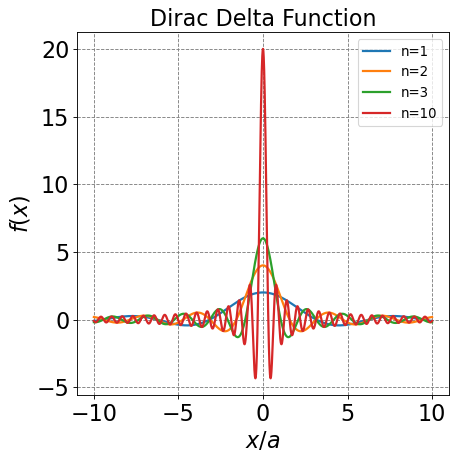

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def f(x,n):
    return 2*np.sin(x*n)/x
# 
x = np.arange(-10,10,0.001)
# setup plot parameters
fig = plt.figure(figsize=(6,6), dpi= 80, facecolor='w', edgecolor='k')
ax = plt.subplot(111)
ax.grid(b=True, which='major', axis='both', color='#808080', linestyle='--')
ax.set_xlabel(r'$x/a$',size=20)
ax.set_ylabel(r'$f(x)$',size=20)
plt.tick_params(axis='both',labelsize=20)
# plot quantum result
ax.plot(x,f(x,1),label="n=1",lw=2)
ax.plot(x,f(x,2),label="n=2",lw=2)
ax.plot(x,f(x,3),label="n=3",lw=2)
ax.plot(x,f(x,10),label="n=10",lw=2)
plt.title("Dirac Delta Function",fontsize=20)
# make legend
ax.legend(fontsize=12,markerscale=5.0);

 ### Deriving the Momentum Operator

We now have all the pieces to derive the expression for the momentum operator in position space.  The map of how we will do this is we recognize
\begin{equation}
\langle p \rangle = \langle \phi(p_x)| p_x | \phi(p_x)\rangle
\end{equation}

We will transform the coordinates in the integrals on the r.h.s of the above equation using Fourier transforms.  Before we do that, however, it is useful to start by taking the spacial derivative of $\psi(x)$
\begin{align}
\frac{\partial}{\partial x}\psi(x) &= \frac{\partial}{\partial x}\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \phi(p_x) e^{ip_xx/\hbar}dp_x \\
&= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \phi(p_x) \frac{\partial}{\partial x}e^{ip_xx/\hbar}dp_x \\
&= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \phi(p_x) \frac{ip_x}{\hbar}e^{ip_xx/\hbar}dp_x \\
&= \frac{i}{\hbar\sqrt{2\pi}}\int_{-\infty}^{\infty} \phi(p_x) p_xe^{ip_xx/\hbar}dp_x \\
\Rightarrow -i\hbar\frac{\partial}{\partial x}\psi(x) &= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} p_x\phi(p_x) e^{ip_xx/\hbar}dp_x
\end{align}
The above equation demonstrates that $i\hbar\frac{\partial}{\partial x}\psi(x)$ and $p_x\phi(p_x)$ are Fourier transforms of eachother.  This will be useful in our coordinate transformation.

Now, let's start
\begin{align}
\langle \phi(p_x)| p_x | \phi(p_x)\rangle = \int_{-\infty}^{\infty}\phi^*(p_x)p_x\phi(p_x)dp_x
\end{align}
In this equation we will substitute that
\begin{align}
\phi^*(p_x) &= \frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \psi^*(x') e^{ip_xx'/\hbar}dx' \\
p_x\phi(p_x) &= \frac{1}{\sqrt{2\pi}}\int_{\infty}^{\infty} \left(-i\hbar\frac{\partial}{\partial x}\psi(x)\right)e^{-ip_xx/\hbar}dx 
\end{align}
where the first relationship is the complex conjugate of the Fourier transform of $\phi$ and the second relationship is the inverse Fourier transform that we just showed.  I use $x'$ in the first expression to disntinguish the integration variables in the two integrals.  Plugging these into the expectation value of $p$ equation yields
\begin{align}
\langle \phi(p_x)| p_x | \phi(p_x)\rangle &= \int_{-\infty}^{\infty}\phi^*(p_x)p_x\phi(p_x)dp_x \\
&= \int_{-\infty}^{\infty}\left[\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty} \psi^*(x') e^{ip_xx'/\hbar}dx'\right]\left[\frac{1}{\sqrt{2\pi}}\int_{\infty}^{\infty} \left(-i\hbar\frac{\partial}{\partial x}\psi(x)\right)e^{-ip_xx/\hbar}dx\right]dp_x \\
&= \frac{1}{2\pi}\int_{-\infty}^{\infty}\left[\int_{-\infty}^{\infty} \psi^*(x') e^{ip_xx'/\hbar}dx'\right]\left[\int_{\infty}^{\infty} \left(-i\hbar\frac{\partial}{\partial x}\psi(x)\right)e^{-ip_xx/\hbar}dx\right]dp_x \\
&=\frac{1}{2\pi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{\infty}^{\infty} \psi^*(x') e^{ip_xx'/\hbar} \left(-i\hbar\frac{\partial}{\partial x}\psi(x)\right)e^{-ip_xx/\hbar}dp_xdx'dx 
\end{align}
where in the last step I can put all terms inside a triple integral because the terms inside the $x'$ and $x$ integrals don't depend on the other integration variable.  I can now combine the two exponential terms (because $e^{ip_xx'/\hbar}$ is constant with respect to $\frac{\partial}{\partial x}$) and then integrate the result over $p_x$:
\begin{align}
\langle \phi(p_x)| p_x | \phi(p_x)\rangle &= \frac{1}{2\pi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{\infty}^{\infty} \psi^*(x') e^{ip_xx'/\hbar} \left(-i\hbar\frac{\partial}{\partial x}\psi(x)\right)e^{-ip_xx/\hbar}dp_xdx'dx \\
&= \frac{1}{2\pi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}\int_{\infty}^{\infty} \psi^*(x') \left(-i\hbar\frac{\partial}{\partial x}\psi(x)\right)e^{ip_x(x'-x)/\hbar}dp_xdx'dx \\
&= \frac{1}{2\pi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \psi^*(x') \left(-i\hbar\frac{\partial}{\partial x}\psi(x)\right)\int_{\infty}^{\infty}e^{ip_x(x'-x)/\hbar}dp_xdx'dx \\
&= \frac{1}{2\pi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \psi^*(x') \left(-i\hbar\frac{\partial}{\partial x}\psi(x)\right)2\pi\delta(x-x')dx'dx
\end{align}
where we recognize the Fourier version of the Dirac delta function in the last step.  The Dirac function now allows us to elimnate one of the integration variables (i.e. $\delta(x-x')$ is only nonzero when $x'=x$) yielding
\begin{align}
\langle \phi(p_x)| p_x | \phi(p_x)\rangle &= \frac{1}{2\pi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty} \psi^*(x') \left(-i\hbar\frac{\partial}{\partial x}\psi(x)\right)2\pi\delta(x-x')dx'dx \\
&= \int_{-\infty}^{\infty} \psi^*(x) \left(-i\hbar\frac{\partial}{\partial x}\psi(x)\right)dx \\
&= \langle \psi(x) | -i\hbar\frac{\partial}{\partial x} | \psi(x)\rangle
\end{align}

Thus
\begin{equation}
\hat{p_x} = -i\hbar\frac{\partial}{\partial x}
\end{equation}
